In [1]:
%load_ext autoreload
%autoreload 2

Generating 500 images
Saved epoch: 117, loss: 11.503975912928581, time: 93.1805408000946


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


oo 57.03482437133789
pred: ['0 (231424)', '2 (11820)', '3 (18900)']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


oo 90.08174133300781
pred: ['0 (244803)', '2 (10981)', '3 (6360)']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


oo 67.20382690429688
pred: ['0 (231484)', '2 (8160)', '3 (22500)']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


oo 96.90625
pred: ['0 (233103)', '2 (19141)', '3 (9900)']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


oo 85.64763641357422
pred: ['0 (226084)', '2 (27000)', '3 (9060)']


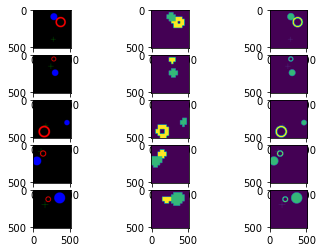

In [2]:
import data_loader
import models  
import torch
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import time
import numpy as np

%matplotlib inline

# setup dataloader
sim_data = data_loader.get_loader("simulated")()
n_classes = sim_data.n_classes

# setup model
model = models.get_model("fcn32s", n_classes)
    
# load saved model
ckpoint = torch.load("checkpoints/fcn32s_0.pkl")
model.load_state_dict(ckpoint["model_state"])
print(f"Saved epoch: {ckpoint['epoch']}, loss: {ckpoint['epoch_loss']}, time: {ckpoint['epoch_time']}")

n_img = 5
ctr = 0
f, axarr = plt.subplots(n_img, 3)
for img ,annt in sim_data:
  out = model(img.unsqueeze(0)) # [batch_sz, n_classes, H=512, W=512]
  print(f"oo {np.max(out.cpu().detach().numpy())}")
  _, pred = out.max(1)
  pred_uv, pred_uc = torch.unique(pred, return_counts=True)
  ps = [f"{p_uv} ({p_uc})" for p_uv, p_uc in zip(pred_uv, pred_uc)]
  print(f"pred: {ps}")
  
  _, pred = sim_data.get_viz(img, pred.squeeze())
  img, annt = sim_data.get_viz(img, annt)
  axarr[ctr,0].imshow(img)
  axarr[ctr,1].imshow(pred)
  axarr[ctr,2].imshow(annt)

  ctr += 1
  if ctr >= n_img:
    break
  





In [3]:
k = 9*[10])
*k

SyntaxError: invalid syntax (<ipython-input-3-16009fc382f5>, line 1)

In [ ]:
path = "data_loader/data/ADEChallengeData2016/images/testing/ADE_val_00000004.jpg"

import os

os.path.splitext(os.path.basename(path))[0]

import torch

tnsr_0 = torch.load("results/tnsr_0.pkl")
print(tnsr_0['out'])

tnsr_1 = torch.load("results/tnsr_1.pkl")
print(tnsr_1['out'])

tnsr_2 = torch.load("results/tnsr_2.pkl")
print(tnsr_2['out'])